In [1]:
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.externals import joblib
import os


tf.enable_eager_execution()



E:\Ana\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
annual_data_PSTexas = pd.read_pickle("./Datapreprocess/PreprocessedData/annual_data_PSTexas.pickle")
hourly_data_PSTexas_ID = np.load('./Datapreprocess/PreprocessedData/hourly_data_PSTexas_HouseholdID.npy')

annual_data_PSTexas_data=[]
for i in hourly_data_PSTexas_ID:
    annual_data_PSTexas_data.append(annual_data_PSTexas[annual_data_PSTexas['HouseholdID']==i].iloc[:,1:].values)
annual_data_PSTexas_data=np.array(annual_data_PSTexas_data)

In [3]:
nums=hourly_data_PSTexas_ID.shape[0]

In [4]:
SD_Texas = joblib.load('./Scaler/SD_annual_bf_C_gen')
SD_Pacific = joblib.load('./Scaler/SD_Pacific')
SD_daily = joblib.load('./Scaler/SD_daily')

In [5]:
class CycleGeneratorXY(tf.keras.Model): #generator from Texas to pacific
    def __init__(self,input_shape):
        super().__init__()
        
        self.encoder_dense1 = tf.keras.layers.Dense(64)
        self.encoder_bh1 = tf.keras.layers.BatchNormalization()
        self.encoder_dense2 = tf.keras.layers.Dense(128)
        self.encoder_bh2 = tf.keras.layers.BatchNormalization()
        self.encoder_dense3 = tf.keras.layers.Dense(256)
        self.encoder_bh3 = tf.keras.layers.BatchNormalization()
        self.encoder_dense4 = tf.keras.layers.Dense(512)
        self.encoder_bh4 = tf.keras.layers.BatchNormalization()
        self.encoder_dense5 = tf.keras.layers.Dense(1024)
        self.encoder_bh5 = tf.keras.layers.BatchNormalization()
        self.encoder_dense6 = tf.keras.layers.Dense(512)
        self.encoder_bh6 = tf.keras.layers.BatchNormalization()
        self.encoder_dense7 = tf.keras.layers.Dense(128)
        self.encoder_bh7 = tf.keras.layers.BatchNormalization()
        self.encoder_dense8 = tf.keras.layers.Dense(64)
        self.encoder_bh8 = tf.keras.layers.BatchNormalization()
        self.encoder_dense9 = tf.keras.layers.Dense(input_shape)

    def call(self,x,is_training):
        x=self.encoder_dense1(x)
        x=self.encoder_bh1(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense2(x)
        x=self.encoder_bh2(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense3(x)
        x=self.encoder_bh3(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense4(x)
        x=self.encoder_bh4(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense5(x)
        x=self.encoder_bh5(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense6(x)
        x=self.encoder_bh6(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense7(x)
        x=self.encoder_bh7(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense8(x)
        x=self.encoder_bh8(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense9(x)
        return x
    
class C_generator(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.encoder_dense1 = tf.keras.layers.Dense(32)
        self.encoder_bh1 = tf.keras.layers.BatchNormalization()
        self.encoder_dense2 = tf.keras.layers.Dense(64)
        self.encoder_bh2 = tf.keras.layers.BatchNormalization()
        self.encoder_dense3 = tf.keras.layers.Dense(128)
        self.encoder_bh3 = tf.keras.layers.BatchNormalization()
        self.encoder_dense4 = tf.keras.layers.Dense(256)
        self.encoder_bh4 = tf.keras.layers.BatchNormalization()
        self.encoder_dense5 = tf.keras.layers.Dense(512)
        self.encoder_bh5 = tf.keras.layers.BatchNormalization()
        self.encoder_dense6 = tf.keras.layers.Dense(1024)
        self.encoder_bh6 = tf.keras.layers.BatchNormalization()
        self.encoder_dense7 = tf.keras.layers.Dense(2048)
        self.encoder_bh7 = tf.keras.layers.BatchNormalization()
        self.encoder_dense8 = tf.keras.layers.Dense(5475)

    def call(self,x,is_training):
        x=self.encoder_dense1(x)
        x=self.encoder_bh1(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense2(x)
        x=self.encoder_bh2(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense3(x)
        x=self.encoder_bh3(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense4(x)
        x=self.encoder_bh4(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense5(x)
        x=self.encoder_bh5(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense6(x)
        x=self.encoder_bh6(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense7(x)
        x=self.encoder_bh7(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense8(x)
        return x

In [6]:
State2State_annual = CycleGeneratorXY(15)
annual2day = C_generator()

In [7]:
checkpoint_State2State = tf.train.Checkpoint(GeneratorXY=State2State_annual)
checkpoint_annual2day = tf.train.Checkpoint(C_gen=annual2day)

In [8]:
checkpoint_State2State.restore('./Model/GeneratorXY-1')
#checkpoint_annual2day.restore('./Model/C_gen-1')
checkpoint_annual2day.restore('./Model/C_gen_conv-1')

In [9]:
def Texas2Pecific_daily(input_data,State2State_annual,annual2day,SD_Texas,SD_Pacific,SD_daily,nums,features):
    annual_data_Texas_SD=SD_Texas.transform(input_data.reshape(nums,-1))
    annual_data_Pacific_SD = State2State_annual(tf.cast(annual_data_Texas_SD,dtype='float64'),True)
    annual_data_Pacific = SD_Pacific.inverse_transform(annual_data_Pacific_SD)
    annual_data_Pacific_SD_fixed = SD_Texas.transform(annual_data_Pacific)
    daily_data_Pacific_SD = annual2day(tf.cast(annual_data_Pacific_SD_fixed,dtype='float64'),True)
    daily_data_Pacific = SD_daily.inverse_transform(daily_data_Pacific_SD)
    daily_data_Pacific = np.absolute(daily_data_Pacific.reshape(nums,-1,features))
    return daily_data_Pacific
    #return annual_data_Pacific

In [10]:
#Generate the synthetic daily data in Pacific region and save
daily_SynPacific_data=Texas2Pecific_daily(annual_data_PSTexas_data,State2State_annual,annual2day,SD_Texas,SD_Pacific,SD_daily,nums,15)
np.save('daily_SynPacific_data',daily_SynPacific_data)

# Evaluation

In [2]:
daily_PSTexas_data=np.load('./Datapreprocess/PreprocessedData/daily_data_PSTexas_data.npy')
daily_PSCA_data=np.load('./Datapreprocess/PreprocessedData/daily_data_PSCA_data.npy')
daily_SynPacific_data=np.load('./daily_SynPacific_data.npy')

In [14]:
#Plot the piechart of the energy usage of each appliance of input data.
def Make_piechart(data, ID = None ,title='Energy Usage Pie Chart' ):
    labels = ['Space_heat',
     'Cooling',
     'Water_heat',
     'Refrigerator',
     'Freezer',
     'Oven',
     'Microwave',
     'Clotheswasher',
     'Clothesdryer',
     'Dishwasher',
     'Furnace',
     'Pool_pump',
     'Hot_tub_pumb',
     'Light&fan',
     'Others']
    if ID == None:
        data_print = np.hstack([np.sum(np.average(data,axis=0),axis=0)[1:],
                  (np.sum(np.average(data,axis=0),axis=0)[0]-sum(np.sum(np.average(data,axis=0),axis=0)[1:]))])
        ratio = data_print/sum(data_print)
        explode_ = []
        for i in range(len(ratio)):
            if ratio[i]>0.01:
                explode_.append(0)
            else:
                explode_.append(0.1)
        fig1, ax1 = plt.subplots(figsize=(10,10))
        wedges, texts, autotexts=ax1.pie(x=data_print,shadow=True,autopct='%1.1f%%', pctdistance=0.9,startangle=90,explode=explode_)
        ax1.axis('equal')
        ax1.legend(wedges,labels,
              title="Appliance",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1),fontsize=15)
        ax1.set_title(title,fontdict={'fontsize':20})

        plt.show()
    else:
        print(1)
        data_print = np.hstack([np.sum(data[ID],axis=0)[1:],
                  (np.sum(data[ID],axis=0)[0]-sum(np.sum(data[ID],axis=0)[1:]))])
        ratio = data_print/sum(data_print)
        explode_ = []
        for i in range(len(ratio)):
            if ratio[i]>0.01:
                explode_.append(0)
            else:
                explode_.append(0.1)
        fig1, ax1 = plt.subplots(figsize=(10,10))
        wedges, texts, autotexts=ax1.pie(x=data_print,shadow=True,autopct='%1.1f%%', pctdistance=0.9,startangle=90,explode=explode_)
        ax1.axis('equal')
        ax1.legend(wedges,labels,
              title="Appliance",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1),fontsize=15)
        ax1.set_title(title,fontdict={'fontsize':20})
        plt.show()        
        

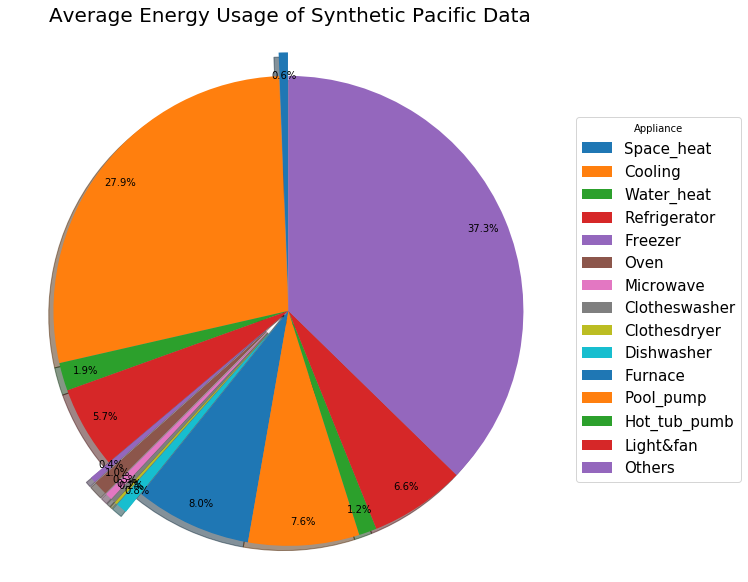

In [12]:
Make_piechart(daily_SynPacific_data,ID = None, title='Average Energy Usage of Synthetic Pacific Data')

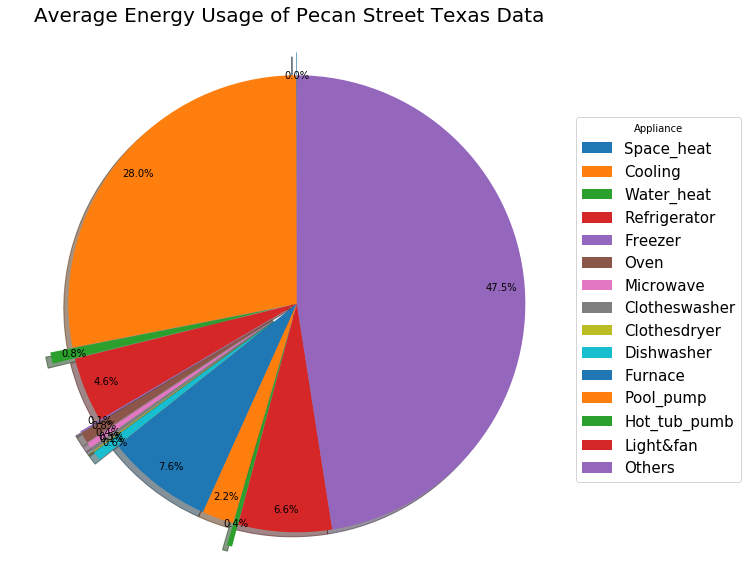

In [13]:
Make_piechart(daily_PSTexas_data,ID = None, title='Average Energy Usage of Pecan Street Texas Data')

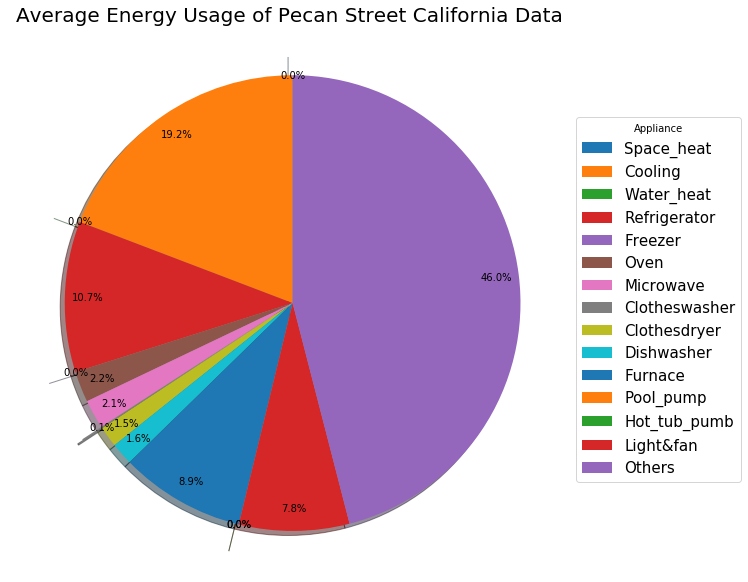

In [14]:
Make_piechart(daily_PSCA_data,ID = None, title='Average Energy Usage of Pecan Street California Data')

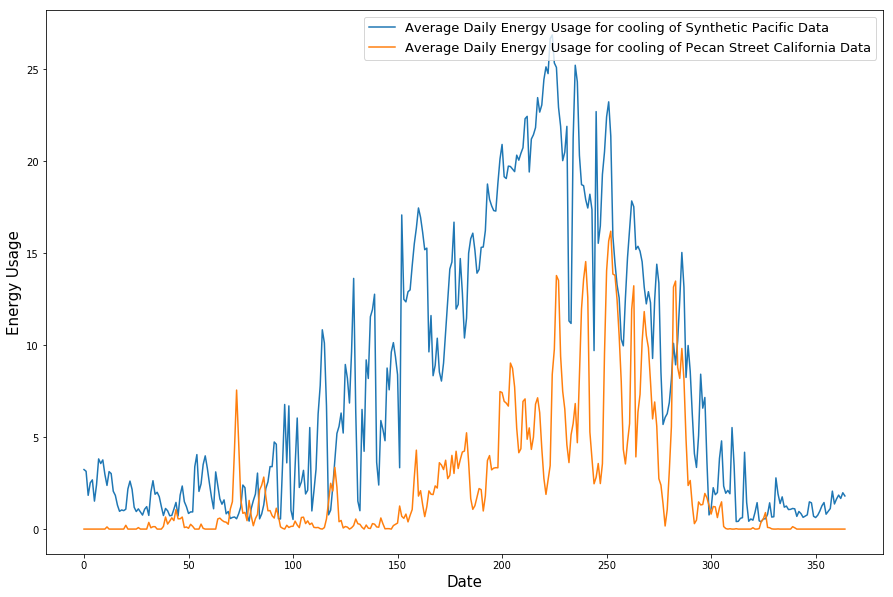

In [15]:
plt.figure(figsize=(15,10))
plt.plot(np.average(daily_SynPacific_data,axis=0)[:,2],label='Average Daily Energy Usage for cooling of Synthetic Pacific Data')
plt.plot(np.average(daily_PSCA_data,axis=0)[:,2],label='Average Daily Energy Usage for cooling of Pecan Street California Data')
plt.legend(fontsize=13)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Energy Usage',fontsize=15)
plt.show()

In [4]:
#calculate the MSE of correlation matrixes of 2 datasets
Cor_syn=np.corrcoef(np.sum(daily_SynPacific_data,axis=1).transpose().astype(float))

Cor_CA=np.corrcoef(np.sum(daily_PSCA_data.astype(float),axis=1).transpose())
Cor_CA[np.isnan(Cor_CA)]=0
for i in range(Cor_CA.shape[0]):
    Cor_CA[i,i] =1 
MSE_Cor=tf.losses.mean_squared_error(Cor_syn,Cor_CA)


E:\Ana\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
E:\Ana\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [6]:
MSE_Cor.numpy()

0.22272119

# Loss plot

In [16]:
GXY_losses = np.load('./Loss/GXY_losses.npy')
DY_losses = np.load('./Loss/DY_losses.npy')
C_gen_losses = np.load('./Loss/C_gen_losses.npy')
C_dis_losses = np.load('./Loss/C_dis_losses.npy')
C_gen_dis_losses = np.load('./Loss/C_gen_dis_conv_losses.npy')
C_L2_conv_losses = np.load('./Loss/C_L2_conv_losses.npy')
C_dis_gen_losses = np.load('./Loss/C_dis_conv_losses.npy')

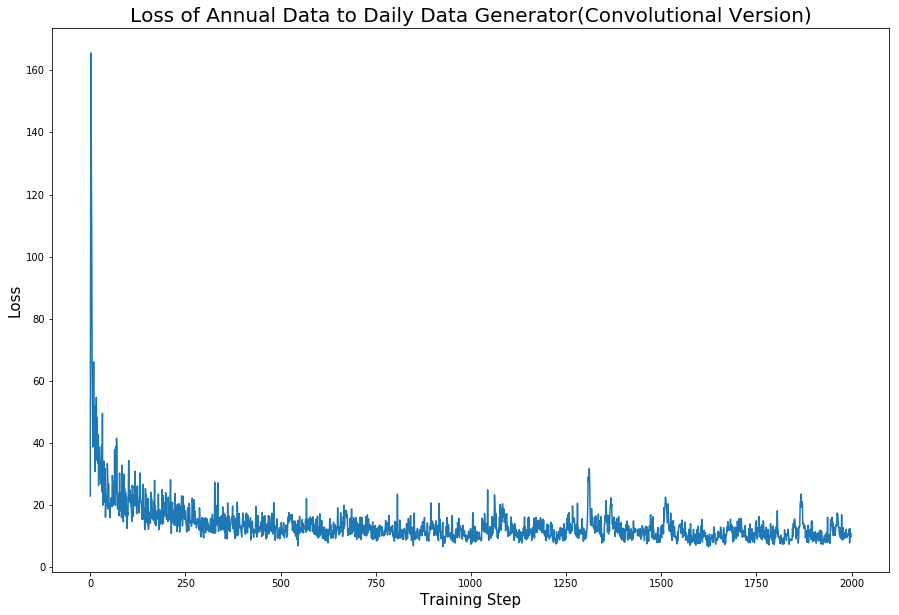

In [17]:
plt.figure(figsize=(15,10))
plt.title('Loss of Annual Data to Daily Data Generator(Convolutional Version)',fontsize = 20)
plt.xlabel('Training Step',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.plot((C_gen_losses+10*(C_L2_conv_losses)))
plt.show()

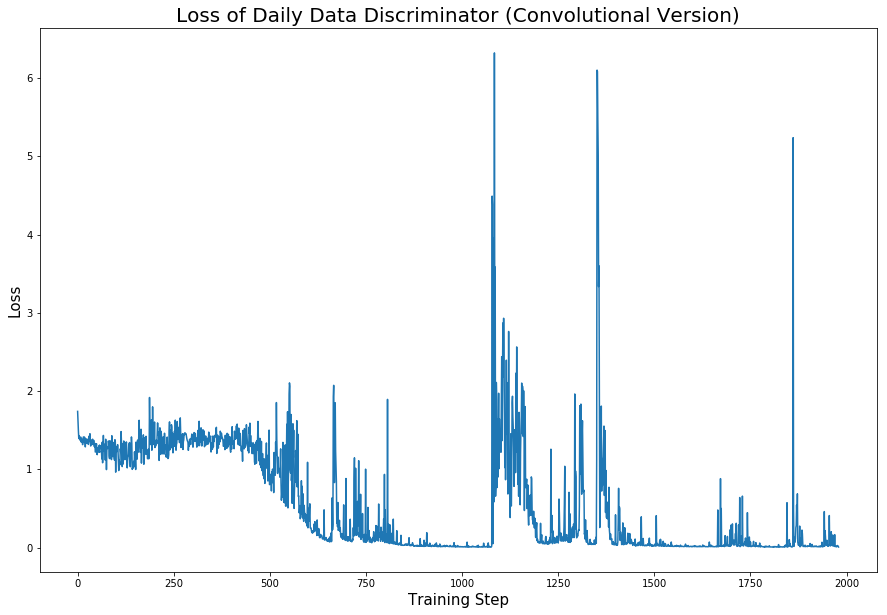

In [202]:
plt.figure(figsize=(15,10))
plt.title('Loss of Daily Data Discriminator (Convolutional Version)',fontsize = 20)
plt.xlabel('Training Step',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.plot(C_dis_gen_losses[:-20])
plt.show()

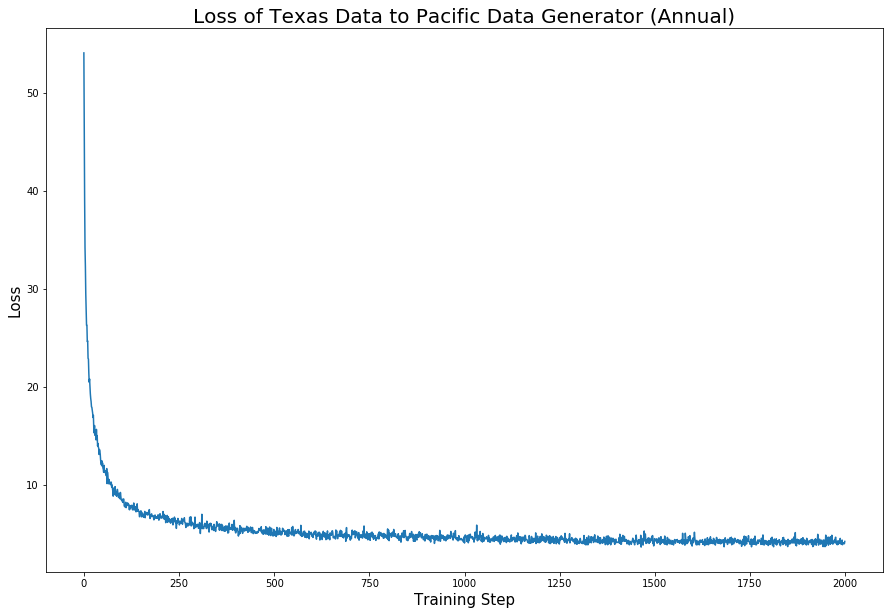

In [118]:
plt.figure(figsize=(15,10))
plt.title('Loss of Texas Data to Pacific Data Generator (Annual)',fontsize = 20)
plt.xlabel('Training Step',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.plot(GXY_losses)
plt.show()

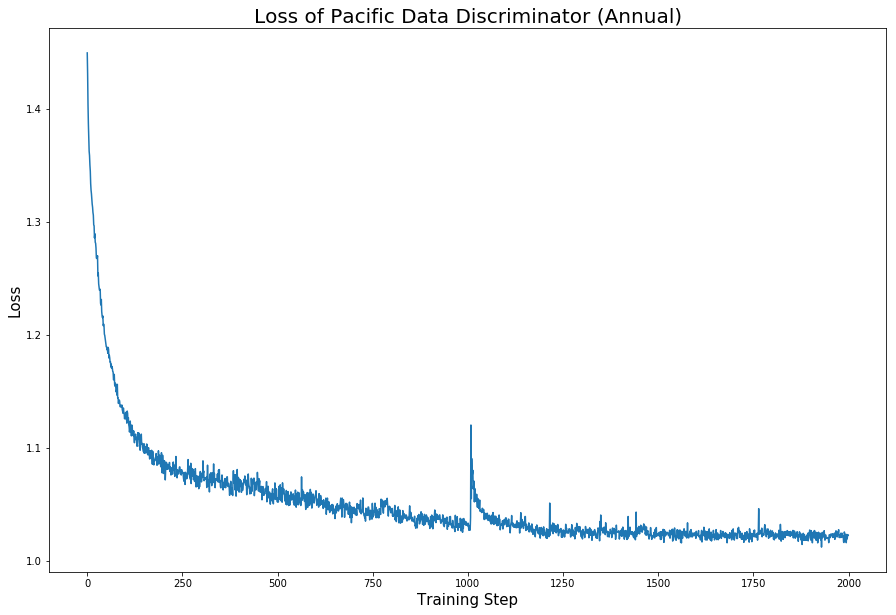

In [119]:
plt.figure(figsize=(15,10))
plt.title('Loss of Pacific Data Discriminator (Annual)',fontsize = 20)
plt.xlabel('Training Step',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.plot(DY_losses)
plt.show()

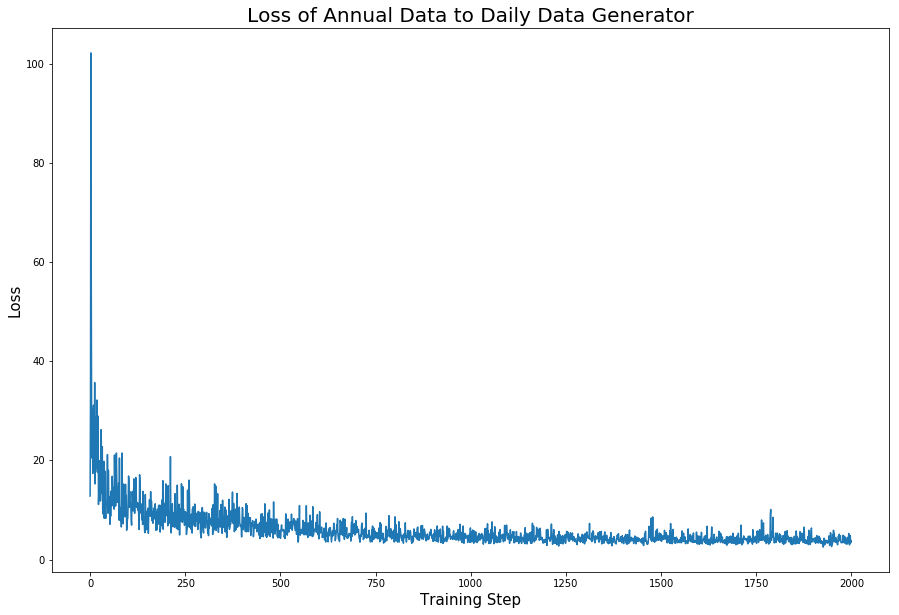

In [122]:
plt.figure(figsize=(15,10))
plt.title('Loss of Annual Data to Daily Data Generator',fontsize = 20)
plt.xlabel('Training Step',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.plot(C_gen_losses)
plt.show()

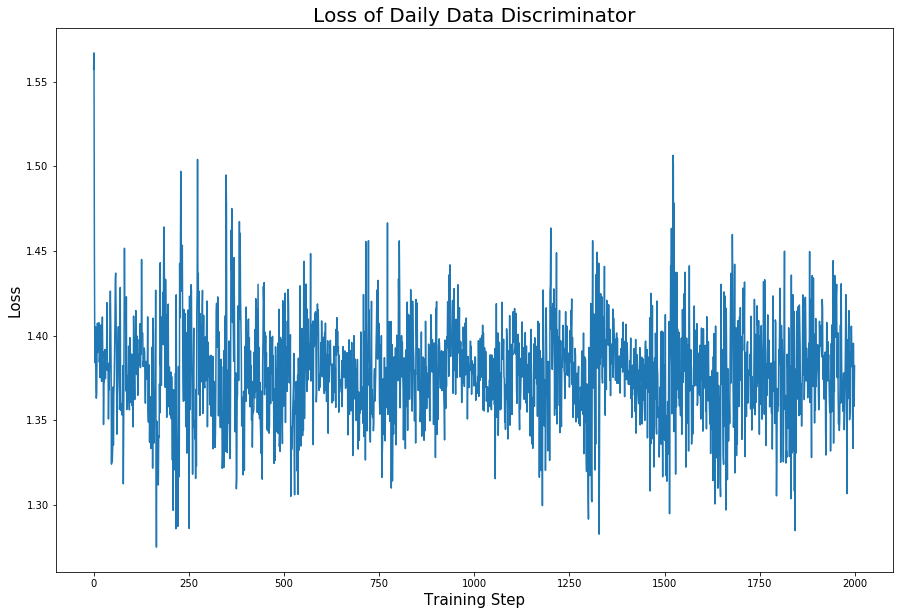

In [123]:
plt.figure(figsize=(15,10))
plt.title('Loss of Daily Data Discriminator',fontsize = 20)
plt.xlabel('Training Step',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.plot(C_dis_losses)
plt.show()